<a href="https://colab.research.google.com/github/kainat-Baloch/AI_Project22/blob/main/Project_using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation 


In [2]:
#importing data File
df = pd.read_csv('/content/p-data.csv')
df.head() 

,ds,STOCK_PRESENT,REFILLING,y,REMAIN_STOCK
0,2019-01-01,3108,0.0,2628,480
1,2019-01-02,480,8000.0,2874,5606
2,2019-01-03,5606,0.0,2856,2750
3,2019-01-04,2750,0.0,2594,156
4,2019-01-05,156,5000.0,2568,2588


In [3]:
df.shape

(731, 5)

In [4]:
df.describe()

,STOCK_PRESENT,REFILLING,y,REMAIN_STOCK
count,731.000000,730.000000,731.000000,731.000000
mean,7652.370725,2638.404110,2654.155951,7633.009576
std,4535.423302,4110.758783,674.492642,4548.663674
min,0.000000,0.000000,0.000000,0.000000
25%,4186.500000,0.000000,2324.000000,4173.500000
50%,7077.000000,0.000000,2624.000000,7059.000000
75%,10281.500000,5000.000000,2941.000000,10281.500000
max,21989.000000,20000.000000,6875.000000,21989.000000


In [5]:
X = df[['ds', 'y']]

In [6]:
X

,ds,y
0,2019-01-01,2628
1,2019-01-02,2874
2,2019-01-03,2856
3,2019-01-04,2594
4,2019-01-05,2568
...,...,...
726,2020-12-27,2077
727,2020-12-28,2263
728,2020-12-29,4765
729,2020-12-30,5000


In [7]:
#asigning algorithm to Varibale Model
Model = Prophet()
Model.fit(X)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = Model.make_future_dataframe(periods=180)
future.tail()

,ds
906,2021-06-25
907,2021-06-26
908,2021-06-27
909,2021-06-28
910,2021-06-29


In [9]:
forecast = Model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
906,2021-06-25,2616.463527,1757.551267,3433.193534
907,2021-06-26,2927.826347,2164.802595,3730.943194
908,2021-06-27,2864.217868,2095.521723,3594.170170
909,2021-06-28,2836.813516,2086.693884,3668.388843
910,2021-06-29,3057.738181,2252.154308,3863.111446


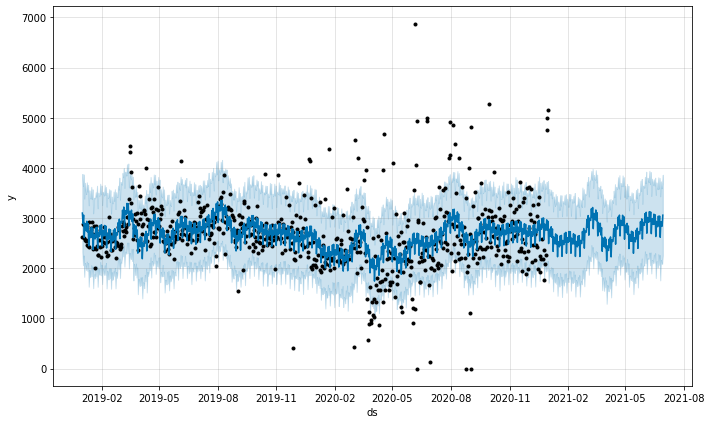

In [10]:
fig1 = Model.plot(forecast)


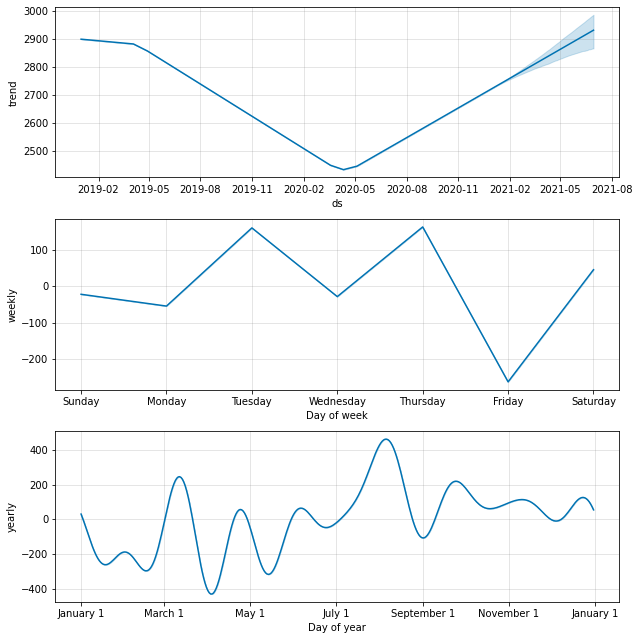

In [11]:
fig2 = Model.plot_components(forecast)


In [12]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(Model, forecast)

In [13]:
plot_components_plotly(Model, forecast)
 

In [14]:
df= cross_validation(Model, initial='500 days', period='70 days', horizon = '30 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-07-14 00:00:00 and 2020-12-01 00:00:00


In [15]:
df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-15,2386.926615,1652.104942,3132.087794,2539,2020-07-14
1,2020-07-16,2521.166411,1782.775587,3251.410403,2512,2020-07-14
2,2020-07-17,2092.417434,1349.094632,2830.877147,2062,2020-07-14
3,2020-07-18,2434.066910,1698.866074,3155.015153,2675,2020-07-14
4,2020-07-19,2382.237047,1585.183081,3175.796074,2401,2020-07-14


In [17]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,86092.095712,293.414546,237.980543,0.083637,0.067757,1.000000
1,4 days,165256.451916,406.517468,321.374968,0.105840,0.090068,0.888889
2,5 days,181659.081471,426.214830,340.635053,0.123257,0.116541,0.888889
3,6 days,382084.355466,618.129724,508.502668,0.167645,0.182271,0.777778
4,7 days,385419.308353,620.821479,543.286829,0.184016,0.182271,0.888889
